<a href="https://colab.research.google.com/github/vaidehivai/PfizerHeartPrediction/blob/main/PfizerProject_MAINCOPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test uploading the dataset


In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart_test.csv to heart_test.csv


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

df1 = pd.read_csv(io.BytesIO(uploaded['heart_test.csv']))

In [3]:
uploaded = files.upload()

Saving heart_train.csv to heart_train.csv


In [4]:
df2 = pd.read_csv(io.BytesIO(uploaded['heart_train.csv']))

In [ ]:
df1.index

RangeIndex(start=0, stop=308, step=1)

In [ ]:
df1.shape

(308, 14)

In [ ]:
df2.shape

(717, 14)

In [ ]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
1,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
2,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1
3,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
4,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,0,1,140,195,0,1,179,0,0.0,2,2,2,1
1,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
2,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
3,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
4,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1


In [ ]:
df1_bias = df1.copy()

In [ ]:
df1_bias.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
1,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
2,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1
3,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
4,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Stacking the provided "train" and "test" data

In [ ]:
df = pd.concat([df1, df2], axis=0)

In [ ]:
df.shape

(1025, 14)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
1,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
2,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1
3,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
4,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking for null values in the dataset.

In [ ]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Summary Statistics:
Frequency Tables for Categorical Data

In [ ]:
categorical_vars = ["target", "sex", "fbs", "exang"]

# Iterate over the list of categorical variables
for var in categorical_vars:
  freq_table_target = pd.crosstab(index = df[var], columns = "total")
  print(freq_table_target)
  print("\n")

col_0   total
target       
0         499
1         526


col_0  total
sex         
0        312
1        713


col_0  total
fbs         
0        872
1        153


col_0  total
exang       
0        680
1        345




In [ ]:
#defining them individually for pie charts
freq_table_target = pd.crosstab(index = df["target"], columns = "total")
freq_table_target

col_0,total
target,
0,499
1,526


In [ ]:
freq_table_sex = pd.crosstab(index = df["sex"], columns = "total")
freq_table_sex

col_0,total
sex,
0,312
1,713


In [ ]:
freq_table_fbs = pd.crosstab(index = df["fbs"], columns = "total")
freq_table_fbs

col_0,total
fbs,
0,872
1,153


In [ ]:
freq_table_exang = pd.crosstab(index = df["exang"], columns = "total")
freq_table_exang

col_0,total
exang,
0,680
1,345


Summary Statistics: Mean, Median, and Standard Deviation for numerical features

In [ ]:
# Need to add mean later
categorical_vars = ["target", "sex", "fbs", "exang"]

for var in categorical_vars:
    mode_value = df[var].mode().values[0]
    median_value = df[var].median()
    print(f"Mode of {var}: {mode_value}")
    print(f"Median of {var}: {median_value}")

Mode of target: 1
Median of target: 1.0
Mode of sex: 1
Median of sex: 1.0
Mode of fbs: 0
Median of fbs: 0.0
Mode of exang: 0
Median of exang: 0.0


We cannot use corrs_sorted because the values in the dataset are binary and numerical. Choose the proper statistical tests based on your data type, consult the following flow chart.

In [ ]:
#exclude = ['target']
#corrs_sorted = df.corr()['target'].drop(exclude, axis = 0).sort_values(ascending = False)
#corrs_sorted

Data visualization techniques:
Boxplots/histograms for numerical values.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-pack

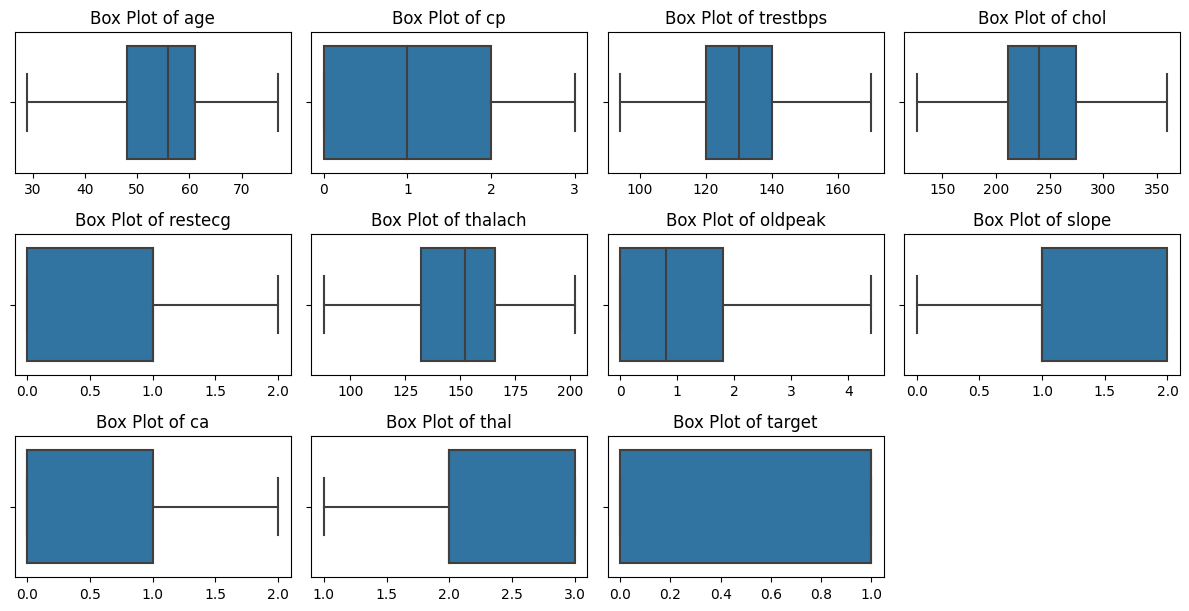

In [ ]:
# Create individual box plots for each numeric feature
numeric_features = df.drop(['sex', 'fbs', 'exang'], axis=1)

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features.columns):
  plt.subplot(4, 4, i + 1) # Create a subplot for each feature
  sns.boxplot(x=numeric_features[feature], orient='vertical', showfliers=False)
  plt.title(f'Box Plot of {feature}')
  plt.xlabel('')
  plt.ylabel('')

plt.tight_layout() # Adjust subplot layout
plt.show()

Create individual histograms for each numeric feature

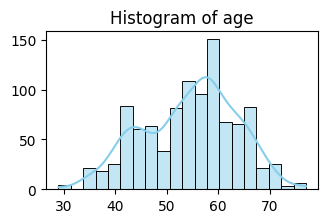

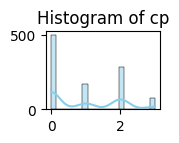

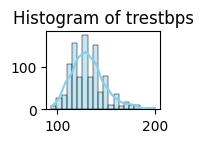

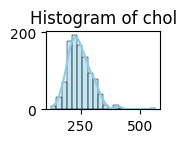

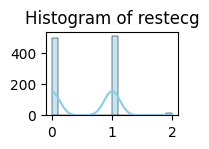

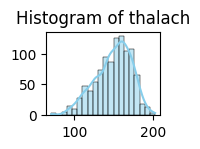

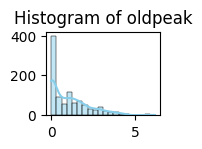

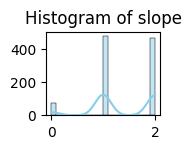

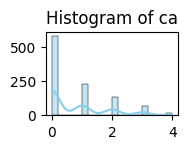

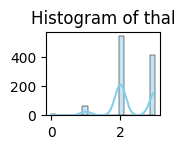

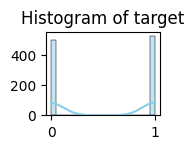

In [ ]:
# Create individual histograms for each numeric feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features.columns):
  plt.subplot(4, 4, i + 1) # Create a subplot for each feature
  sns.histplot(numeric_features[feature], bins=20, kde=True, color='skyblue') # Adjust 'bins' as needed
  plt.title(f'Histogram of {feature}')
  plt.xlabel('')
  plt.ylabel('')

  plt.tight_layout() # Adjust subplot layout
  plt.show()

Data Visualization Techniques: Bar charts/pie charts for the categorical data (sex, exang, fbs)


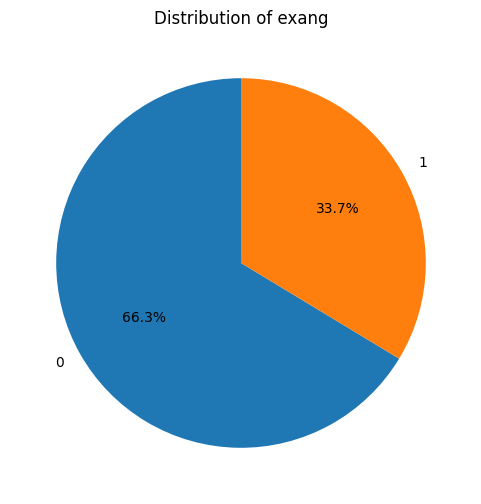

In [ ]:
# Plotting the pie chart for exang
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(freq_table_exang['total'], labels=freq_table_exang.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of exang')
plt.show()

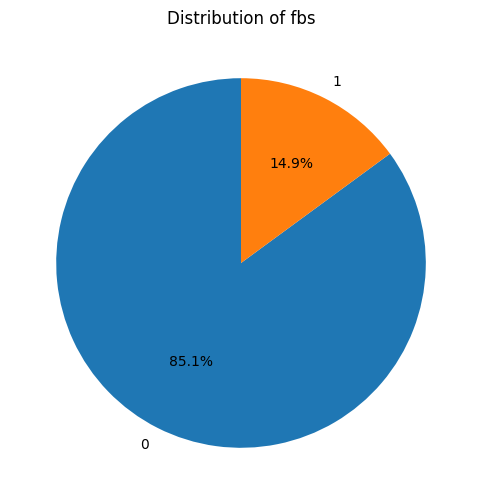

In [ ]:
# Pie chart for fbs
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(freq_table_fbs['total'], labels=freq_table_fbs.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of fbs')
plt.show()

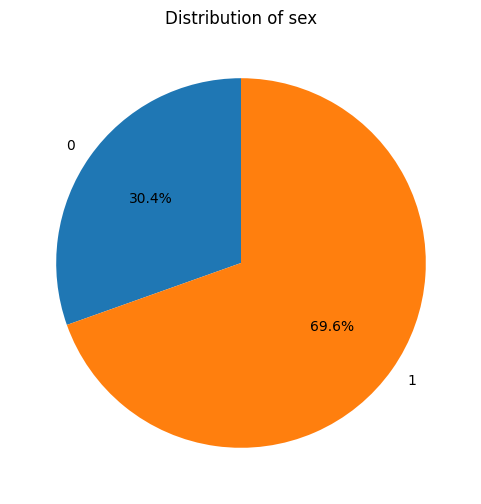

In [ ]:
# Pie chart for sex
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(freq_table_sex['total'], labels=freq_table_sex.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of sex')
plt.show()

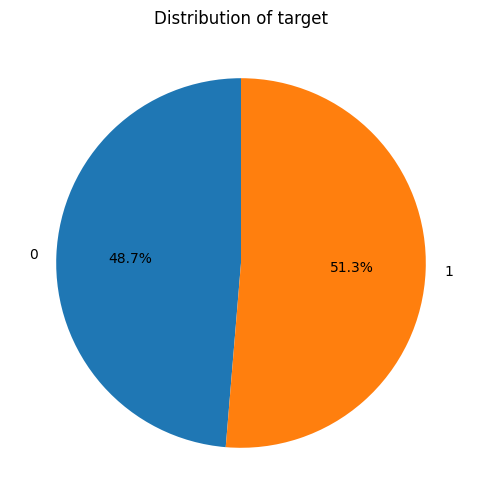

In [ ]:
#Pie chart for target
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(freq_table_target['total'], labels=freq_table_target.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of target')
plt.show()

Binning the Age Variable

In [ ]:
bin_edges = [0,45,60,100]

#bin_edges_first = [0,45]
#bin_edges_second = [46,60]
#bin_edges_third = [61,100]

In [ ]:
df['age'] = pd.cut(df['age'], bins = bin_edges, labels = ['0-44', '45-60', '61+'])

#df['0-44'] = pd.cut(df['age'], bins = bin_edges_first, labels = ['0-44'])
#df['45-60'] = pd.cut(df['age'], bins = bin_edges_second, labels = ['45-60'])
#df['61+'] = pd.cut(df['age'], bins = bin_edges_third, labels = ['61+'])

Graphing the Age Bins

In [ ]:
age_bin_counts = df['age'].value_counts()
age_bin_summary = pd.DataFrame(age_bin_counts).reset_index()
age_bin_summary.columns = ['age_range', 'count']
age_bin_number_mapping = {'0-44':1, '45-60':2,'61+':3}
age_bin_summary['group_number'] = age_bin_summary['age_range'].map(age_bin_number_mapping)
age_bin_summary = age_bin_summary.sort_values (by = 'age_range')
age_bin_summary = age_bin_summary.reset_index(drop = True)
print(age_bin_summary)

  age_range  count group_number
0      0-44    213            1
1     45-60    540            2
2       61+    272            3


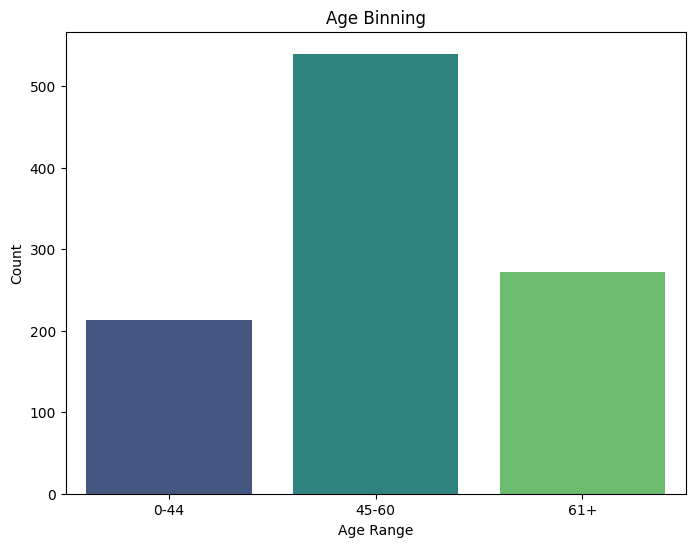

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='age_range', y= 'count', data = age_bin_summary, palette='viridis')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Age Binning')
plt.show()

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0-44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
1,61+,1,2,160,269,0,1,112,1,2.9,1,1,3,0
2,0-44,1,2,120,226,0,1,169,0,0.0,2,0,2,1
3,45-60,1,3,118,186,0,0,190,0,0.0,1,0,1,1
4,45-60,0,0,110,254,0,0,159,0,0.0,2,0,2,1


One-Hot-Encoding the Age Variable

In [ ]:
#df = pd.get_dummies(data=df, columns=['0-44', '45-60', '61+'])
df = pd.get_dummies(data=df, columns=['age'])

In [ ]:
df.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_0-44,age_45-60,age_61+
0,1,1,130,219,0,0,188,0,0.0,2,0,2,1,1,0,0
1,1,2,160,269,0,1,112,1,2.9,1,1,3,0,0,0,1
2,1,2,120,226,0,1,169,0,0.0,2,0,2,1,1,0,0
3,1,3,118,186,0,0,190,0,0.0,1,0,1,1,0,1,0
4,0,0,110,254,0,0,159,0,0.0,2,0,2,1,0,1,0


In [ ]:
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('age_0-44')) #Remove age_0-44 from list
cols.pop(cols.index('age_45-60')) #Remove age_45-60 from list
cols.pop(cols.index('age_61+')) #Remove age_61+ from list

'age_61+'

In [ ]:
df = df[['age_0-44','age_45-60','age_61+']+cols] #Create new dataframe with the age columns at the front

In [ ]:
df.head()

,age_0-44,age_45-60,age_61+,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,0,0,1,1,130,219,0,0,188,0,0.0,2,0,2,1
1,0,0,1,1,2,160,269,0,1,112,1,2.9,1,1,3,0
2,1,0,0,1,2,120,226,0,1,169,0,0.0,2,0,2,1
3,0,1,0,1,3,118,186,0,0,190,0,0.0,1,0,1,1
4,0,1,0,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Exploring two categorical: age and target
Iterate over list of categorical to print all.

In [ ]:
# # Create contingency table and Chi Squared


# # NEWLY ADDED - DELETE COMMENT LATER

# # Exploring two categorical: age and target Iterate over list of categorical to print all:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# categorical_vars = ["age_0-44", "age_45-60", "age_61+", "sex", "fbs", "exang", "ca"]

# # Iterate over the list of categorical variables
# for var in categorical_vars:
#   # Create a contingency table
#   ct_table_ind = pd.crosstab(df["target"], df[var])
#   # Print the contingency table
#   print(f"Contingency table for {var} vs. target:")
#   print(ct_table_ind)
#   print("\n")

In [ ]:
# import scipy.stats
# from scipy.stats import chi2
# chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)

# print(f"chi2 statistic:     {chi2_stat:.5g}")
# print(f"p-value:            {p:.5g}")
# print(f"degrees of freedom: {dof}")
# print("expected frequencies:\n",expected)

# # small p value indicates relationship between target and age

In [ ]:
import scipy.stats
from scipy.stats import chi2
# print ALL contigency tables AND chi squared values

categorical_vars = ["age_0-44", "age_45-60", "age_61+", "sex", "fbs", "exang", "ca"]

# Create dictionaries to store contingency tables and chi-squared results
contingency_tables = {}
chi_squared_results = {}

# Iterate over the list of categorical variables
for var in categorical_vars:
    # Create a contingency table
    ct_table_ind = pd.crosstab(df["target"], df[var])

    # Store the contingency table in the dictionary
    contingency_tables[var] = ct_table_ind

    # Perform the chi-squared test
    chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)

    # Store the chi-squared results in the dictionary
    chi_squared_results[var] = {"chi2_stat": chi2_stat, "p": p, "dof": dof, "expected": expected}

# Print or use the stored contingency tables and chi-squared results as needed
for var, ct_table in contingency_tables.items():
    print(f"Contingency table for {var} vs. target:")
    print(ct_table)
    print("\n")

for var, result in chi_squared_results.items():
    print(f"Chi-squared results for {var}:")
    print(f"chi2 statistic:     {result['chi2_stat']:.5g}")
    print(f"p-value:            {result['p']:.5g}")
    print(f"degrees of freedom: {result['dof']}")
    print("expected frequencies:\n", result['expected'])
    print("\n")

Contingency table for age_0-44 vs. target:
age_0-44    0    1
target            
0         442   57
1         370  156


Contingency table for age_45-60 vs. target:
age_45-60    0    1
target             
0          218  281
1          267  259


Contingency table for age_61+ vs. target:
age_61+    0    1
target           
0        338  161
1        415  111


Contingency table for sex vs. target:
sex       0    1
target          
0        86  413
1       226  300


Contingency table for fbs vs. target:
fbs       0   1
target         
0       417  82
1       455  71


Contingency table for exang vs. target:
exang     0    1
target          
0       225  274
1       455   71


Contingency table for ca vs. target:
ca        0    1    2   3   4
target                       
0       163  160  113  60   3
1       415   66   21   9  15


Chi-squared results for age_0-44:
chi2 statistic:     50.621
p-value:            1.1203e-12
degrees of freedom: 1
expected frequencies:
 [[395.30536585 103.

Splitting the indepdent (X) and dependent (y) variables.

Assign df1 as test and df2 as train


X is independent (everything except target), y is dependent (target)

At the end, before training/testing


Define X_test (df1) —> (iloc the indep variables)
Define y_test (df1) —> (iloc last column bc its target)

Define X_train (df2) —> (iloc the indep variables)
Define y_train (df2) —> (iloc last column bc its target)

Split the df back into df1 (test) and df2 (train)

In [ ]:
df1 = df.iloc[:308]

In [ ]:
df1.shape

(308, 16)

In [ ]:
df1.head() # Just to check if they were split at the right area

,age_0-44,age_45-60,age_61+,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,0,0,1,1,130,219,0,0,188,0,0.0,2,0,2,1
1,0,0,1,1,2,160,269,0,1,112,1,2.9,1,1,3,0
2,1,0,0,1,2,120,226,0,1,169,0,0.0,2,0,2,1
3,0,1,0,1,3,118,186,0,0,190,0,0.0,1,0,1,1
4,0,1,0,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df2 = df.iloc[308:1025]

In [ ]:
df2.shape

(717, 16)

In [ ]:
df2.head() # Just to check if they were split at the right area

,age_0-44,age_45-60,age_61+,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,0,1,0,1,140,195,0,1,179,0,0.0,2,2,2,1
1,0,1,0,0,0,180,327,0,2,117,1,3.4,1,0,2,0
2,0,1,0,1,2,130,246,1,0,173,0,0.0,2,3,2,1
3,0,1,0,1,0,170,326,0,0,140,1,3.4,0,0,3,0
4,0,0,1,1,0,160,228,0,0,138,0,2.3,2,0,1,1


Assign X_train, y_train, X_test, y_test

In [ ]:
X_train = df2.drop(columns='target') # Independent Variables
y_train = df2['target']

X_test = df1.drop(columns='target')
y_test = df1['target']

In [ ]:
df['sex'].unique()

array([1, 0])

In [ ]:
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

Testing and Evaluating Various Models - NEWLY ADDED

Some Notes to Remember:
**Precision:** Of all the instances the model predicted as positive, how many were really positive?
*   Higher precision is better.

**Recall:** Of all the actual positive cases, how many did the model correctly identify?
*   Higher recall is better - means the model is better at finding actual postive cases

**F1-score:** a balance between precision and recall.

**Support:** the number of actual occurrences of each class in the dataset

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import GridSearchCV, learning_curve
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.model_selection import cross_val_score

# # Define the Gradient Boosted Decision Tree classifier model
# gbdt_model = GradientBoostingClassifier()

# # Set up the parameter grid for GridSearchCV
# param_grid = {
# 'n_estimators': [50, 100, 200, 300],
# 'learning_rate': [0.01, 0.1, 0.2],
# 'max_depth': [3, 4, 5, 6, 7],
# 'min_samples_leaf': [3, 5, 7]
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=gbdt_model, param_grid=param_grid, cv=5, n_jobs=-1)

# # Fit the grid search to your data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Use the best hyperparameters to create the final model
# best_gbdt_model = GradientBoostingClassifier(**best_params)

# # Evaluate the model with the best hyperparameters using cross-validation
# cv_scores = cross_val_score(best_gbdt_model, X, y, cv=5, scoring='accuracy')
# print("Cross-Validation Scores:", cv_scores)
# print("Mean CV Score:", np.mean(cv_scores))
# print("Standard Deviation of CV Scores:", np.std(cv_scores))

# # Plot the learning curve for the best model
# train_sizes, train_scores, test_scores = learning_curve(best_gbdt_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10))

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# plt.figure(figsize=(10, 6))
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
# train_scores_mean + train_scores_std, alpha=0.1, color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
# test_scores_mean + test_scores_std, alpha=0.1, color="g")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# plt.xlabel("Training examples")
# plt.ylabel("Score")
# plt.legend(loc="best")
# plt.title("Learning Curve")
# plt.show()

k = 1:
Accuracy: 0.9610
Precision: 0.9610
Recall: 0.9610
--------------------------
k = 2:
Accuracy: 0.9026
Precision: 0.9083
Recall: 0.9026
--------------------------
k = 3:
Accuracy: 0.8669
Precision: 0.8671
Recall: 0.8669
--------------------------
k = 4:
Accuracy: 0.7727
Precision: 0.7856
Recall: 0.7727
--------------------------
k = 5:
Accuracy: 0.7143
Precision: 0.7145
Recall: 0.7143
--------------------------
k = 6:
Accuracy: 0.7013
Precision: 0.7069
Recall: 0.7013
--------------------------
k = 7:
Accuracy: 0.7143
Precision: 0.7145
Recall: 0.7143
--------------------------
k = 8:
Accuracy: 0.7110
Precision: 0.7116
Recall: 0.7110
--------------------------


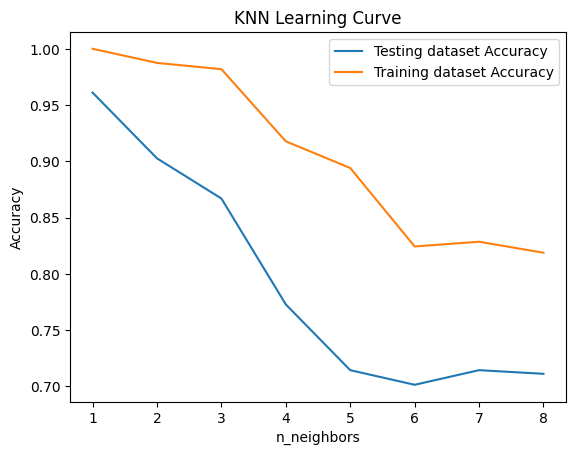

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Load Iris dataset
irisData = load_iris()
# Create feature and target arrays
X = irisData.data
y = irisData.target
# Split into training and test set
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # Make predictions
    y_pred = knn.predict(X_test)
    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f'k = {k}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print('--------------------------')
    # Store accuracy values
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = accuracy
# Generate plot
plt.plot(neighbors, test_accuracy, label='Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label='Training dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Learning Curve')
plt.show()

Cross-Validation:
Assesses the generalization performance of a model. It involves partitioning the dataset into multiple subsets (or "folds"), training and testing the model on different subsets, and then averaging the results. K-fold cross-validation: the data is divided into k subsets (folds).
- Divide the dataset into k equally sized folds.
- Train the model k times, each time using k-1 folds for training and the remaining fold for testing.
- Compute performance metrics (e.g., accuracy, error) for each fold.
- Average the performance metrics to get an overall assessment of the model's performance.
Benefits: Provides a more robust estimate of a model's performance, reduces the risk of overfitting, and allows you to detect how well a model generalizes to
unseen data.

Learning Curves:
Graphical representations that help you understand how a model's performance changes as you vary the size of the training dataset. Learning curves typically plot the model's performance metric (e.g., accuracy, error) on the y-axis and the number of training examples on the x-axis. The learning curve consists of two main lines:
Training Score: It indicates how well the model fits (its performance) the training data as the training set size increases.

Cross-Validation Score: Shows the model's performance on the validation (or test) data as the training set size increases --> can show how well the model generalizes to new data.

Benefits: Detect underfitting: If the training and cross-validation scores are both low and converge, the model may be underfitting the data, and increasing the dataset size might not help much), Detect overfitting: If there's a large gap between the training and cross-validation scores, the model may be overfitting the data, and more data or model simplification may be needed.

Determine the optimal dataset size: Learning curves can help you determine the right amount of data needed to achieve good performance.


No need to do acc_score = accuracy_score(y_test, class_label_predictions), because it only does it for best one

Implement cross-validation - Alternate method, doesn't have hyperparameter tuning. Grid Search already does this.
cv_scores = cross_val_score(logistic_model, X, y, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Mean CV Score:', np.mean(cv_scores))


Best Hyperparameters: {'C': 0.1}


Mean score: 0.8679, Standard deviation: 0.0089, Hyperparameters: {'C': 0.1}
Mean score: 0.8656, Standard deviation: 0.0190, Hyperparameters: {'C': 0.2}
Mean score: 0.8629, Standard deviation: 0.0216, Hyperparameters: {'C': 1}
Mean score: 0.8629, Standard deviation: 0.0216, Hyperparameters: {'C': 2}
Mean score: 0.8599, Standard deviation: 0.0200, Hyperparameters: {'C': 10}


split0_test_score:
 [0.87581699 0.88741722 0.89333333 0.89333333 0.89333333]
split1_test_score:
 [0.86419753 0.86419753 0.85889571 0.85889571 0.85889571]
split2_test_score:
 [0.88       0.88       0.88       0.88       0.86486486]
split3_test_score:
 [0.85526316 0.83221477 0.83221477 0.83221477 0.83221477]
split4_test_score:
 [0.86419753 0.86419753 0.85       0.85       0.85      ]

mean test score:
 [0.86789504 0.86560541 0.86288876 0.86288876 0.85986173]

std test score:
 [0.00890163 0.01898346 0.02164544 0.02164544 0.02003957]


Classification Report:
              precision    

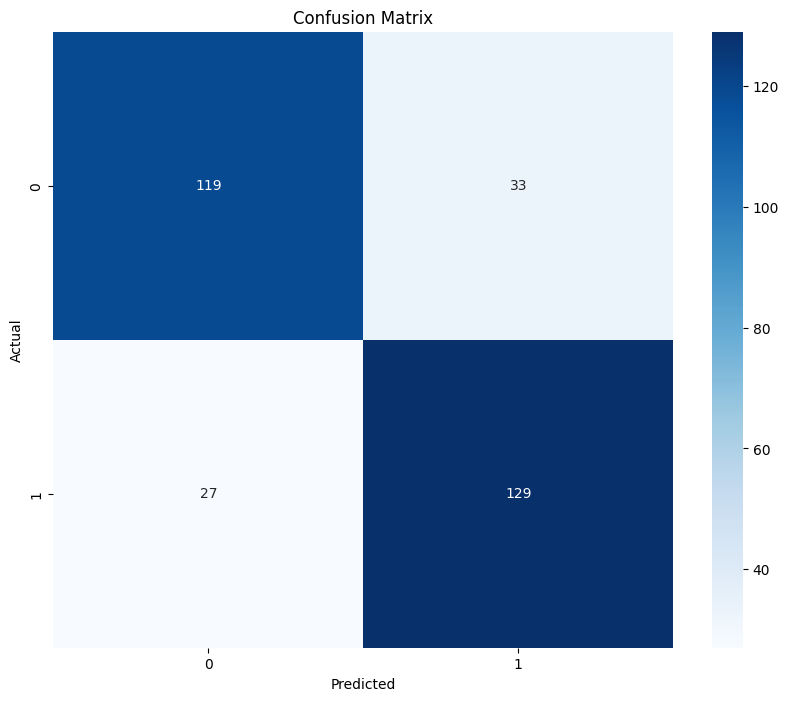

Coefficients:
[[ 0.15096544 -0.08125807 -0.04666867 -0.64972976  0.78002078 -0.12250072
  -0.27617931 -0.05607289  0.22876481  0.43686368 -0.46968967 -0.60478735
   0.33075752 -0.66399182 -0.48034677]]


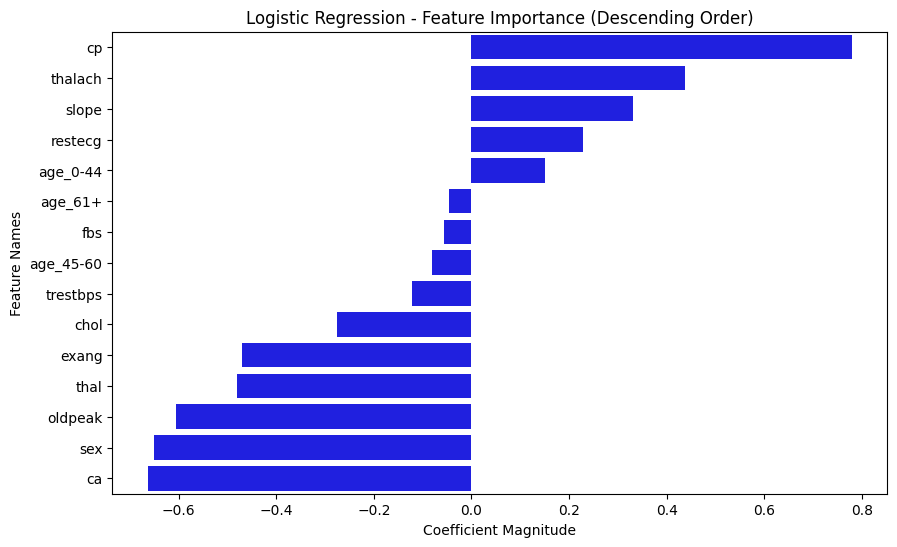

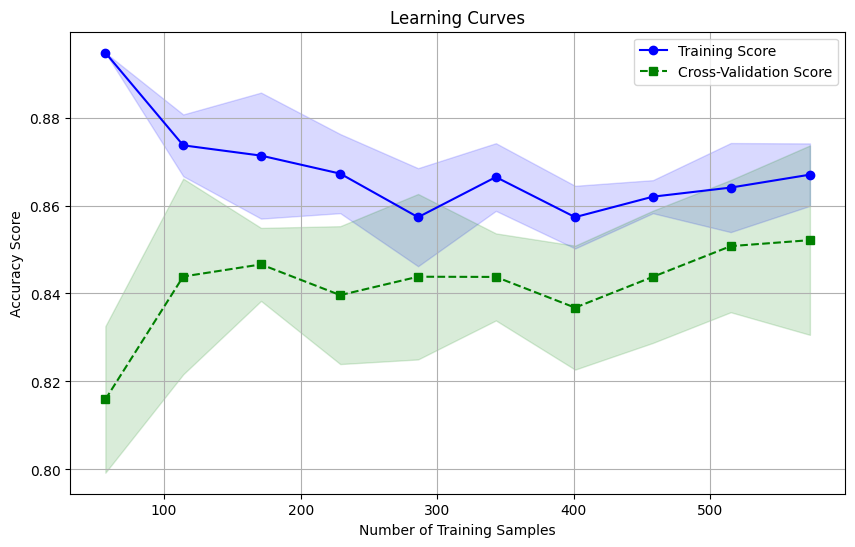

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler object and fit/transform on training data, then transform test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the LogisticRegression model
logistic_model = LogisticRegression(solver='lbfgs', max_iter=10000, penalty='l2')  # Use 'l2' penalty

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 0.2, 1, 2, 10],
}

# Create a grid search
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='f1') # No need to fit again

# Fit the grid search to your data. No need to separately fit the LR model and update it with the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Evaluate the Model: Make predictions on the test data using the predict() method
class_label_predictions = grid_search.predict(X_test_scaled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

print("\n")

# # Print the scores for each hyperparam among folds, the mean score and the std. Maria's way

# print('split0 test score: ', grid_search.cv_results_['split0_test_score'])
# print('split1 test score: ', grid_search.cv_results_['split1_test_score'])
# print('split2 test score: ', grid_search.cv_results_['split2_test_score'])
# print('split3 test score: ', grid_search.cv_results_['split3_test_score'])
# print('split4 test score: ', grid_search.cv_results_['split4_test_score'])
# print('mean test score: ', grid_search.cv_results_['mean_test_score'])
# print('std test score: ', grid_search.cv_results_['std_test_score'])

# print("\n")

# Get the mean score for each hyperparameter among folds. My way.
cv_results = grid_search.cv_results_
for mean_score, std, params in zip(cv_results['mean_test_score'], cv_results['std_test_score'], cv_results['params']):
    print(f"Mean score: {mean_score:.4f}, Standard deviation: {std:.4f}, Hyperparameters: {params}")

print("\n")

# Print the scores for each hyperparameter among folds, mean score, and the std.
for key in grid_search.cv_results_:
    if 'split' in key and 'test_score' in key:
        print(f'{key}:\n', grid_search.cv_results_[key])

print('\nmean test score:\n', grid_search.cv_results_['mean_test_score'])
print('\nstd test score:\n', grid_search.cv_results_['std_test_score'])

print("\n")

# Print classification report
classification_rep = classification_report(y_test, class_label_predictions)
print("Classification Report:")
print(classification_rep)

print("\n")

list_of_variable_names = X_train.columns

# Extract unique labels from the actual labels (y_test)
unique_labels = np.unique(y_test)

# Print confusion matrix with all unique labels
confusion_mat = confusion_matrix(y_test, class_label_predictions, labels=unique_labels)
print("Confusion Matrix:")
print(confusion_mat)

print("\n")

# Plot a confusion matrix with all unique labels. indicate percentages for things like false positives
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the coefficients for each variable
coefficients = grid_search.best_estimator_.coef_
print("Coefficients:")
print(coefficients)

# Extract the coefficients for the positive class
coefficients_positive_class = pd.Series(grid_search.best_estimator_.coef_[0], index=list_of_variable_names)

# Sort coefficients in descending order
coefficients_positive_class_sorted = coefficients_positive_class.sort_values(ascending=False)

# Feature Importance Plot sorted by descending order
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients_positive_class_sorted, y=coefficients_positive_class_sorted.index, color='blue')
plt.title('Logistic Regression - Feature Importance (Descending Order)')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature Names')
plt.show()

# Create learning curves
train_sizes, train_scores, test_scores = learning_curve(logistic_model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Learning Curves')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
# Random Forest

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, learning_curve, GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)

#Define the hyperparameters and possible values for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    #결정트리의 갯수를 지정, default:10
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [5, 6 ,7],
    'min_samples_leaf': [5, 6, 7]
}

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test data
y_pred = grid_search.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# Print the scores for each hyperparameter among folds, the mean score, and the std.
print('split0 test score:\n', grid_search.cv_results_['split0_test_score'])
print('\nsplit1 test score:\n', grid_search.cv_results_['split1_test_score'])
print('\nsplit2 test score:\n', grid_search.cv_results_['split2_test_score'])
print('\nsplit3 test score:\n', grid_search.cv_results_['split3_test_score'])
print('\nsplit4 test score:\n', grid_search.cv_results_['split4_test_score'])
print('\nmean test score:\n', grid_search.cv_results_['mean_test_score'])
print('\nstd test score:\n', grid_search.cv_results_['std_test_score'])

# Print the classification report based on the best estimator
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}
split0 test score:
 [0.93877551 0.93877551 0.93877551 0.93877551 0.93877551 0.93877551
 0.93877551 0.93877551 0.93877551 0.94594595 0.95238095 0.93959732
 0.94594595 0.95238095 0.93959732 0.94594595 0.95238095 0.93959732
 0.94039735 0.94039735 0.93333333 0.94039735 0.94039735 0.93333333
 0.94039735 0.94039735 0.93333333 0.93877551 0.93877551 0.93877551
 0.93877551 0.93877551 0.93877551 0.93877551 0.93877551 0.93877551
 0.95238095 0.95238095 0.94594595 0.95238095 0.95238095 0.94594595
 0.95238095 0.95238095 0.94594595 0.94039735 0.94039735 0.93333333
 0.94039735 0.94039735 0.93333333 0.94039735 0.94039735 0.93333333
 0.93877551 0.93877551 0.93877551 0.93877551 0.93877551 0.93877551
 0.93877551 0.93877551 0.93877551 0.94594595 0.95238095 0.93959732
 0.94594595 0.95238095 0.93959732 0.94594595 0.95238095 0.93959732
 0.94039735 0.94039735 0.93333333 0.94039735 0.94039735 0.93333333

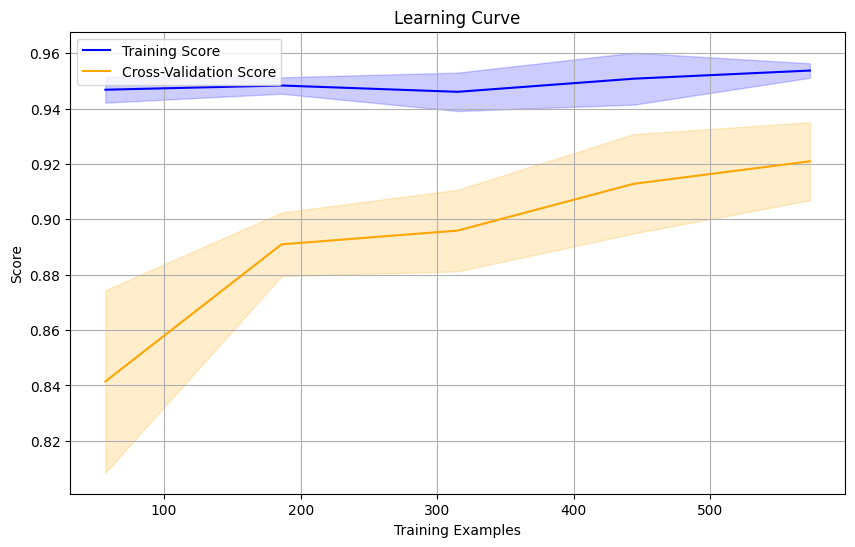

In [ ]:
from sklearn.model_selection import learning_curve

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)

# Calculate mean and standard deviation of training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of test scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")

# Plot mean accuracy scores for training and test sets
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", color="orange")

# Plot the shaded area to represent the uncertainty of the scores
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="blue",
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="orange",
)

plt.legend(loc="best")
plt.grid()
plt.show()

Start bias detection using aequitas: https://github.com/dssg/aequitas


In [ ]:
pip install aequitas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.4/456.4 kB 40.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.8/727.8 kB 55.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 55.6 MB/s eta 0:00:00
  Created wheel for Fl

In [ ]:
df1_bias.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
1,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
2,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1
3,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
4,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
print(df1_bias[['age', 'sex']])

     age  sex
0     44    1
1     70    1
2     44    1
3     52    1
4     50    0
..   ...  ...
303   57    1
304   61    1
305   66    1
306   64    0
307   43    0

[308 rows x 2 columns]


In [ ]:
import aequitas
from aequitas.group import Group

df1_bias["score"] = class_label_predictions

bin_edges_bias = [0, 45, 60, 100]

df1_bias['age'] = pd.cut(df1_bias['age'], bins=bin_edges_bias, labels=['0-44', '45-60', '61+'])

df1_bias = pd.get_dummies(data=df1_bias, columns=['age'])

df1_bias['age_0-44'] = df1_bias['age_0-44'].astype(str) # to change it to object
df1_bias['age_45-60'] = df1_bias['age_45-60'].astype(str) # to change it to object
df1_bias['age_61+'] = df1_bias['age_61+'].astype(str) # to change it to object

df1_bias['sex'] = np.where(df1_bias['sex']== 1, "male", 'female') # if everything shows up as female, reload entire notebook

print(df1_bias['sex'].value_counts())

df1_bias['label_value'] = df1_bias['target'] # in order for aequitas to recognize target

df_subset = df1_bias[['age_0-44', 'age_45-60', 'age_61+', 'sex', 'label_value', 'score']]
#df_subset.info()

male      219
female     89
Name: sex, dtype: int64


In [ ]:
#fairness evaluation

import aequitas
from aequitas.group import Group

df_subset = df1_bias[['age_0-44', 'age_45-60', 'age_61+', 'sex', 'label_value', 'score']].copy()

g = Group()

xtab, _ = g.get_crosstabs(df_subset)
print(xtab)

   model_id score_threshold    k attribute_name attribute_value       tpr  \
0         0      binary 0/1  162       age_0-44               0  0.763636   
1         0      binary 0/1  162       age_0-44               1  0.978261   
2         0      binary 0/1  162      age_45-60               0  0.815789   
3         0      binary 0/1  162      age_45-60               1  0.837500   
4         0      binary 0/1  162        age_61+               0  0.888889   
5         0      binary 0/1  162        age_61+               1  0.566667   
6         0      binary 0/1  162            sex          female  0.909091   
7         0      binary 0/1  162            sex            male  0.766667   

        tnr       for       fdr       fpr  ...     pprev  fp  fn   tn   tp  \
0  0.807407  0.192593  0.236364  0.192593  ...  0.448980  26  26  109   84   
1  0.588235  0.090909  0.134615  0.411765  ...  0.825397   7   1   10   45   
2  0.746032  0.229508  0.205128  0.253968  ...  0.561151  16  14   47   

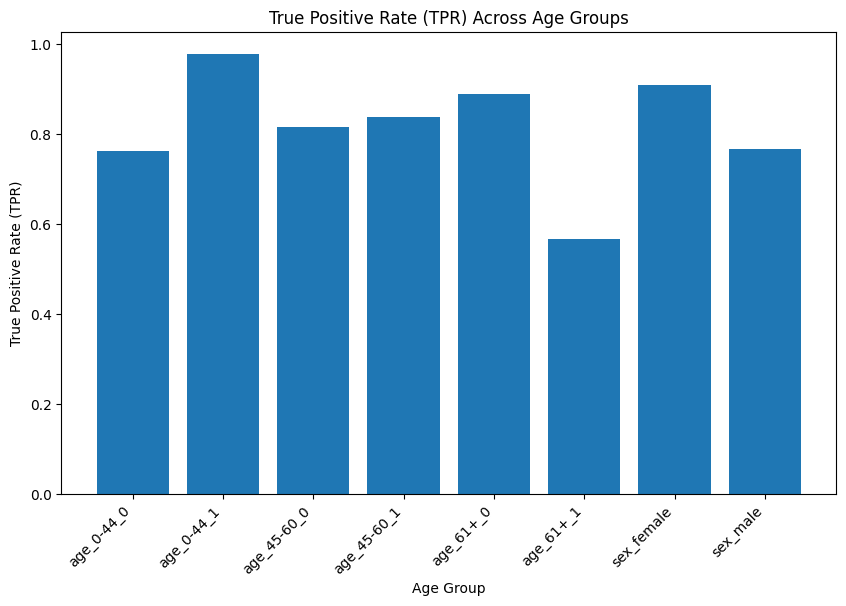

In [ ]:
attributes_of_interest = ['age_0-44', 'age_45-60', 'age_61+', 'sex']
filtered_xtab = xtab[xtab['attribute_name'].isin(attributes_of_interest)]

# Plot TPR for different age groups
plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_xtab.index, filtered_xtab['tpr'])
plt.xlabel('Age Group')
plt.ylabel('True Positive Rate (TPR)')
plt.title('True Positive Rate (TPR) Across Age Groups')

# Concatenate attribute_name and attribute_value for x-axis labels
labels = [f"{name}_{value}" for name, value in zip(filtered_xtab['attribute_name'], filtered_xtab['attribute_value'])]

# Set x-axis labels
plt.xticks(filtered_xtab.index, labels, rotation=45, ha='right')

plt.show()


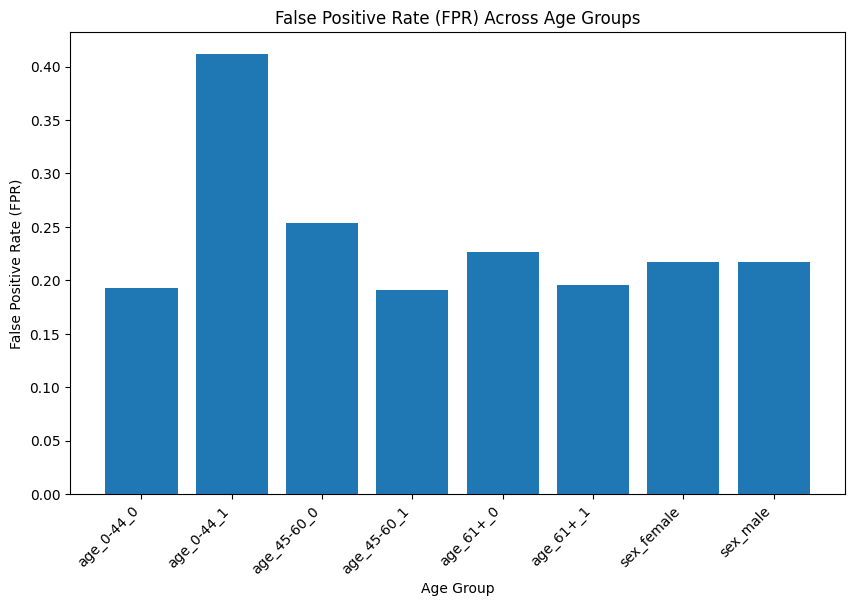

In [ ]:
attributes_of_interest = ['age_0-44', 'age_45-60', 'age_61+', 'sex']
filtered_xtab = xtab[xtab['attribute_name'].isin(attributes_of_interest)]
# Plot TPR for different age groups
plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_xtab.index, filtered_xtab['fpr'])
plt.xlabel('Age Group')
plt.ylabel('False Positive Rate (FPR)')
plt.title('False Positive Rate (FPR) Across Age Groups')

# Concatenate attribute_name and attribute_value for x-axis labels
labels = [f"{name}_{value}" for name, value in zip(filtered_xtab['attribute_name'], filtered_xtab['attribute_value'])]

# Set x-axis labels
plt.xticks(filtered_xtab.index, labels, rotation=45, ha='right')

plt.show()


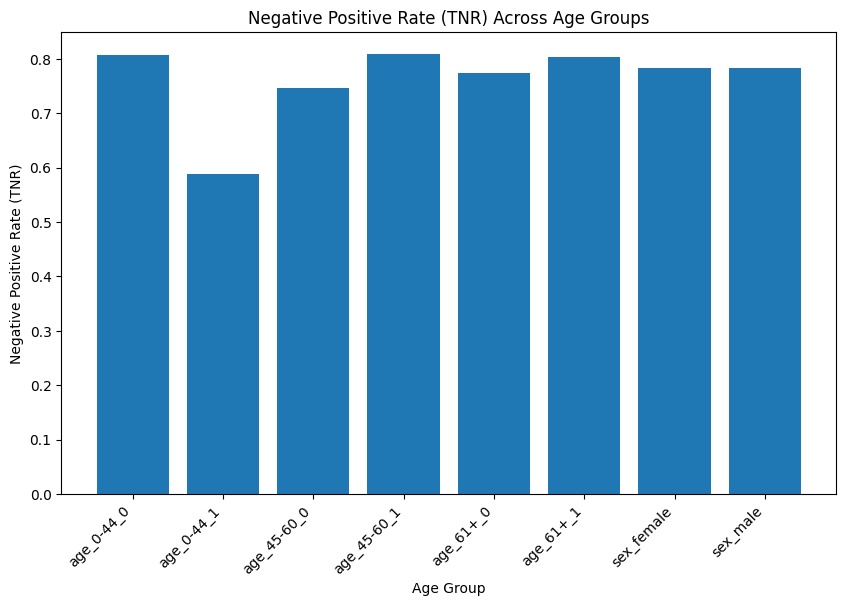

In [ ]:
attributes_of_interest = ['age_0-44', 'age_45-60', 'age_61+', 'sex']
filtered_xtab = xtab[xtab['attribute_name'].isin(attributes_of_interest)]

# Plot TPR for different age groups
plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_xtab.index, filtered_xtab['tnr'])
plt.xlabel('Age Group')
plt.ylabel('Negative Positive Rate (TNR)')
plt.title('Negative Positive Rate (TNR) Across Age Groups')

# Concatenate attribute_name and attribute_value for x-axis labels
labels = [f"{name}_{value}" for name, value in zip(filtered_xtab['attribute_name'], filtered_xtab['attribute_value'])]

# Set x-axis labels
plt.xticks(filtered_xtab.index, labels, rotation=45, ha='right')

plt.show()


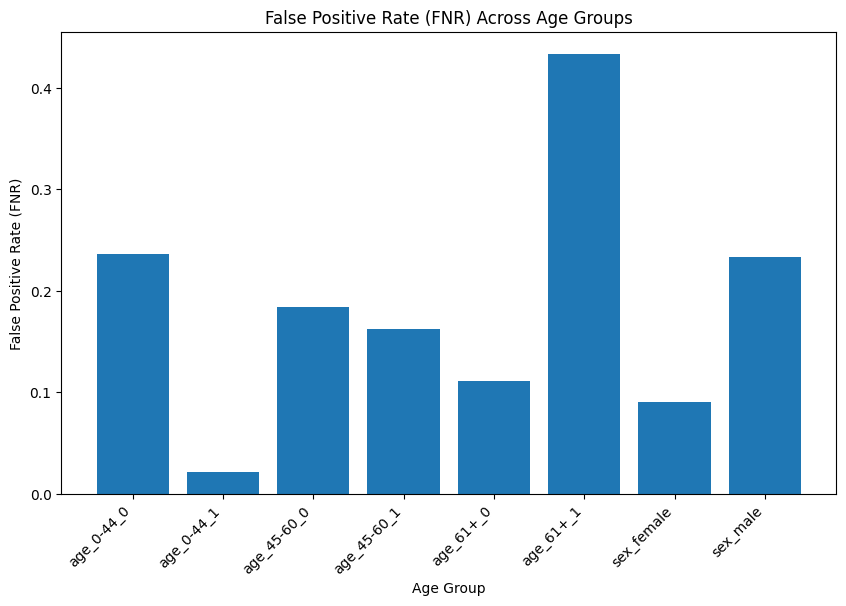

In [ ]:
attributes_of_interest = ['age_0-44', 'age_45-60', 'age_61+', 'sex']
filtered_xtab = xtab[xtab['attribute_name'].isin(attributes_of_interest)]
# Plot TPR for different age groups
plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_xtab.index, filtered_xtab['fnr'])
plt.xlabel('Age Group')
plt.ylabel('False Positive Rate (FNR)')
plt.title('False Positive Rate (FNR) Across Age Groups')

# Concatenate attribute_name and attribute_value for x-axis labels
labels = [f"{name}_{value}" for name, value in zip(filtered_xtab['attribute_name'], filtered_xtab['attribute_value'])]

# Set x-axis labels
plt.xticks(filtered_xtab.index, labels, rotation=45, ha='right')

plt.show()


In [ ]:
print("Unique values in 'sex':", df_subset['sex'].unique())
print("Columns in DataFrame:", df_subset.columns)
print(df_subset.head())


Unique values in 'sex': ['male' 'female']
Columns in DataFrame: Index(['age_0-44', 'age_45-60', 'age_61+', 'sex', 'label_value', 'score'], dtype='object')
  age_0-44 age_45-60 age_61+     sex  label_value  score
0        1         0       0    male            1    1.0
1        0         0       1    male            0    0.0
2        1         0       0    male            1    1.0
3        0         1       0    male            1    1.0
4        0         1       0  female            1    1.0


In [ ]:
# Print the columns of df1_bias
print(df1_bias.columns)

Index(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target', 'score', 'age_0-44',
       'age_45-60', 'age_61+', 'label_value'],
      dtype='object')


In [ ]:
# female should be like 90%

from aequitas.bias import Bias
b = Bias()
bdf = b.get_disparity_predefined_groups(xtab,
                                        original_df=df_subset,
                                        ref_groups_dict={'sex': 'female', 'age': '61+'},
                                        alpha=0.05,
                                        check_significance=True)

bdf

get_disparity_predefined_group()


ValueError: ignored

In [ ]:
print(df_subset.head())
print(ref_groups_dict)


  age_0-44 age_45-60 age_61+     sex  label_value  score
0        1         0       0    male            1    1.0
1        0         0       1    male            0    0.0
2        1         0       0    male            1    1.0
3        0         1       0    male            1    1.0
4        0         1       0  female            1    1.0


NameError: ignored

In [ ]:
#bias mitigation

!pip install aif360

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.1/214.1 kB 2.2 MB/s eta 0:00:00


In [ ]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [ ]:
from aif360.datasets import StandardDataset
from aif360.algorithms.preprocessing import Reweighing

# Assuming df_subset is your Pandas DataFrame
# Define privileged and unprivileged groups based on your dataset
privileged_groups = [{'sex': 'male'}]
unprivileged_groups = [{'sex': 'female'}]

# Convert your DataFrame to a StandardDataset
dataset = StandardDataset(df=df_subset, label_name='sex', favorable_classes=['male'],
                          protected_attribute_names=['sex'], privileged_classes=[['male']])

# Apply Reweighing algorithm
reweighing = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
dataset_reweighted = reweighing.fit_transform(dataset)


/usr/local/lib/python3.10/dist-packages/aif360/metrics/utils.py:36: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  group_cond = np.logical_and(group_cond, X[:, index] == val)
/usr/local/lib/python3.10/dist-packages/aif360/algorithms/preprocessing/reweighing.py:66: RuntimeWarning: invalid value encountered in double_scalars
  self.w_p_fav = n_fav*n_p / (n*n_p_fav)
/usr/local/lib/python3.10/dist-packages/aif360/algorithms/preprocessing/reweighing.py:67: RuntimeWarning: invalid value encountered in double_scalars
  self.w_p_unfav = n_unfav*n_p / (n*n_p_unfav)
/usr/local/lib/python3.10/dist-packages/aif360/algorithms/preprocessing/reweighing.py:68: RuntimeWarning: invalid value encountered in double_scalars
  self.w_up_fav = n_fav*n_up / (n*n_up_fav)
/usr/local/lib/python3.10/dist-packages/aif360/algorithms/preprocessing/reweighing.py:69: RuntimeWarning: invalid value encountered in double_scalars
  self.w_up_

In [ ]:
from aif360.datasets import StandardDataset
from aif360.algorithms.preprocessing import Reweighing

# Assuming df_subset is your Pandas DataFrame
# Define privileged and unprivileged groups based on your dataset
privileged_groups = [{'sex': 'male'}]
unprivileged_groups = [{'sex': 'female'}]

# Convert your DataFrame to a StandardDataset
dataset = StandardDataset(df=df_subset, label_name='sex', favorable_classes=[1],
                          protected_attribute_names=['sex'], privileged_classes=[[1]])

# Apply Reweighing algorithm
reweighing = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
dataset_reweighted = reweighing.fit_transform(dataset)



/usr/local/lib/python3.10/dist-packages/aif360/algorithms/preprocessing/reweighing.py:66: RuntimeWarning: invalid value encountered in double_scalars
  self.w_p_fav = n_fav*n_p / (n*n_p_fav)
/usr/local/lib/python3.10/dist-packages/aif360/algorithms/preprocessing/reweighing.py:67: RuntimeWarning: invalid value encountered in double_scalars
  self.w_p_unfav = n_unfav*n_p / (n*n_p_unfav)
/usr/local/lib/python3.10/dist-packages/aif360/algorithms/preprocessing/reweighing.py:68: RuntimeWarning: invalid value encountered in double_scalars
  self.w_up_fav = n_fav*n_up / (n*n_up_fav)


In [ ]:
# Check unique values in the 'sex' column
unique_sex_values = df_subset['sex'].unique()
print(unique_sex_values)


['male' 'female']


Bias Mitigation: https://github.com/Trusted-AI/AIF360

In [ ]:
# Check if instances with 'sex' equal to 1 are present
privileged_instances = df_subset[df_subset['sex'] == 1]
print(privileged_instances)


Empty DataFrame
Columns: [age_0-44, age_45-60, age_61+, sex, label_value, score]
Index: []
